In [1]:
#import sys is needed to set a max treshold to view the entirety of the r matrix 
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys  
#For the scaling factor code
import random
import math
import matplotlib.ticker as mtick

(array([78, 79, 80, 81]),)
[4.25001e-08 1.28122e-07 1.96790e-07]
[[1.00000000e-01 1.00000000e-01 3.49522878e-12]
 [1.00000000e-01 2.00000000e-01 3.06984838e-12]
 [1.00000000e-01 3.00000000e-01 2.42434012e-12]
 ...
 [1.20000000e+00 4.20000000e+00 2.75359908e-13]
 [1.20000000e+00 4.30000000e+00 4.06361978e-13]
 [1.20000000e+00 4.40000000e+00 5.68371447e-13]]
[[1.10000000e+00 3.50000000e+00 1.91716797e-14]]


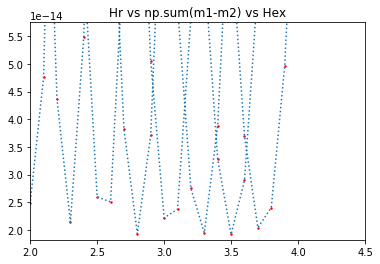

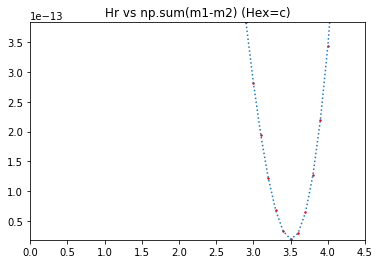

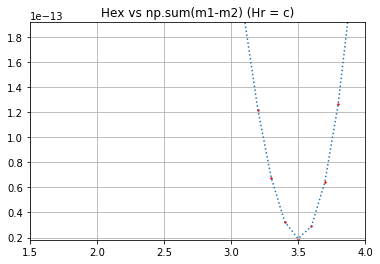

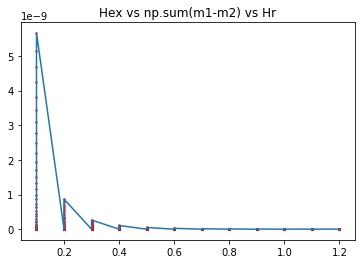

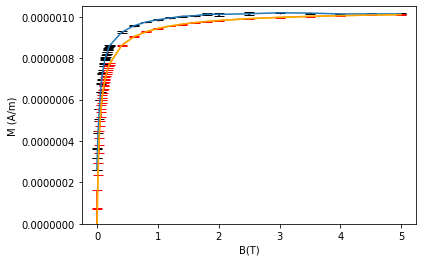

(array([474]), array([2]))
[1.10000000e+00 3.50000000e+00 1.91716797e-14]
[1.1000000e+00 3.4000000e+00 3.2760238e-14]
[-1.39354433e-07  1.18297386e-08  1.19247658e-07  2.64919968e-07
  3.61345909e-07  4.31142684e-07  4.84635444e-07  5.27296313e-07
  5.62330875e-07  5.91757705e-07  6.16919461e-07  6.38748461e-07
  6.57914950e-07  6.74914755e-07  6.90123582e-07  7.03831999e-07
  7.16268718e-07  7.27616548e-07  7.38023588e-07  7.47611259e-07
  7.56480178e-07  7.64714521e-07  7.72385319e-07  8.62220947e-07
  9.03080899e-07  9.27261525e-07  9.43496865e-07  9.55248765e-07
  9.64193109e-07  9.71250060e-07  9.76970962e-07  9.81708159e-07
  9.90631189e-07  9.96888232e-07  1.00151747e-06  1.00507667e-06
  1.00789379e-06  1.01017484e-06]
[8.46728019e-08 5.76967491e-08 4.28442976e-08 2.74794658e-08
 1.98750619e-08 1.54609597e-08 1.26289530e-08 1.06823522e-08
 9.27515878e-09 8.21796676e-09 7.39922085e-09 6.74935560e-09
 6.22295331e-09 5.78922242e-09 5.42661835e-09 5.11965713e-09
 4.85695106e-09 4.6

(0, 1.15e-06)

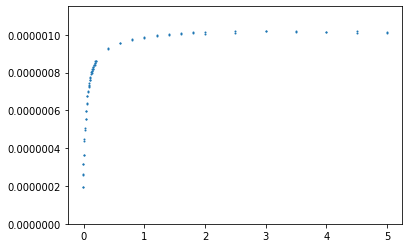

In [37]:
# arrays for loop                   ### SAMPLE 1 ZONE 2 ### (DELETED DATA AROUND Y=0)
r = np.zeros([1000000,3])                   
o = np.zeros([10000,2])



### SAMPLE 1 ZONE 2 ###         
data = np.genfromtxt('S1Zone2')  #or data = np.recfromtxt('S1a2_MvsH_bgs.txt', names=['B', 'M']) ... B = data.B ... M = data.M
X = data[:,][:,0] #B data
Y = data[:,][:,1] #M data
r = np.zeros([10000000,3])
Hc = 0.0273481639
Ms = 1.02781E-6
# Getting rid of values smaller than 14% of Msat 
print(np.where(Y<0.15*Ms)) # Printing the data points being deleted
X = X[np.where(Y>0.15*Ms)]
Y = Y[np.where(Y>0.15*Ms)]


# MEAN DATA
mdata = np.genfromtxt('S1Z2 MEAN.txt')
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data

#Getting rid of values smaller than 14% of Msat 
print(mY[np.where(mY<0.2*Ms)]) # Printing the data points being deleted
inxER = np.where(mY>0.2*Ms) # condition to keep future arrays of same size
mX = mX[np.where(mY>0.2*Ms)]
mY = mY[np.where(mY>0.2*Ms)]


n = 0 # nmax, mmax = 7000 good habit
m = 0

# The Loop:
for Hex in np.arange(0.1,1.3,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,4.5,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX+Hc)/Hex)**0.5 # @@@@@ W.A.S X BEFORE!
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2) # @@@@@ W.A.S Y BEFORE!
        inx = np.min(r[n,2])
        
        dHr = Hr - 0.005
        dHex = Hex - 0.005
        dMs = Ms - 0.002E-6
        dHc = Hc - 0.0020
        λ2 = (dHr/dHex)
        p2 = ((mX+dHc)/dHex)**0.5  # dMs and λ2 and p2
        dM2 = np.absolute(M2 - (dMs*(1 - (λ2**2/(30*p2**4))*(2 - ((2 + 2*p2 + p2**2)*np.exp(-p2)))))   )
    
    
        n+=1  

# Printing ALL VALUES: (inx to get rid of np.zeros)
inx = r[:,1]>0
r = r[inx]
#np.set_printoptions(threshold=sys.maxsize)  # see import sys notes above
print(r)
print(r[r[:,2]==np.min(r[:,2])])

#   1st Graph: 

# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hr vs np.sum(m1-m2) vs Hex')
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])]) # 2nd limit was 3*
plt.show()

#   2nd Graph:

# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hr vs np.sum(m1-m2) (Hex=c)')
plt.xlim(0,4.5) # was 2
plt.ylim([0.95*np.min(r[:,2]),20*np.min(r[:,2])]) # was 3
plt.show()

# VISIBLE ERROR on np.sum 
plt.xlim(1.5,4)
plt.ylim([0.95*np.min(r[:,2]),10*np.min(r[:,2])])
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('ERROR - Hr vs np.sum(m1-m2) vs Hex - ')
plt.grid()


#   3rd Graph:

# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hex vs np.sum(m1-m2) (Hr = c)')
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


#   4th Graph(s):

# Hex vs np.min(sum(M2-M1))
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.title('Hex vs np.sum(m1-m2) vs Hr')
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()


# 5th Graph (M_ram and M_data):
#Plotting
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
plt.scatter(mX,mY,s=1, c="red", alpha=1)


# Standard Error of Mean (already half) 
SE = np.genfromtxt('S1Z2MEANERROR.txt')[inxER] #Don't forget inx!
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=1, ecolor="black")


plt.plot(mX,M2,color="orange")                                     # @@@@  W.A.S  X before!
plt.ylim(0,10.5E-7)
plt.xlabel('B(T)')
plt.ylabel('M (A/m)')
#plt.title('M_data + M_ram vs Magnetic Field')
plt.errorbar(mX,M2, yerr=[dM2,dM2], capsize=5, capthick=1, ecolor="red", color="orange")
plt.show()




#print(np.where(r[:,1][r[:,0]== Hex])#[r[:,1]== Hr]))



print(np.where(r == np.min(r[:,2])))
print(r[474])
print(r[473])


print(M2)
print(dM2)

plt.scatter(X,Y,s=1,alpha=1)
plt.ylim(0,11.5E-7)

In [ ]:
#### VISIBLE ERROR on np.sum of 2nd Graph + Polyfit
plt.xlim(1.3,4.5)
plt.ylim([0.5*np.min(r[:,2]),5*np.min(r[:,2])])
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('ERROR - Hr vs SSmin vs Hr - ')


x = r[:,1][r[:,0]== Hex] #Hr
print(x)
y = r[:,2][r[:,0]== Hex] #np.sum(M_ram - M_data)^2
print(y)

# Assume point of inflexion at ~ 2.1
# Thus x[x[:]>2] makes polyfit STARTS at x=2.1 ... same for y!
X = x[(x[:]>2.1)&(x[:]<4.2)] # When entering more than 1 boolean condition. use paretheses and "&" symbol
Y = y[(x[:]>2.1)&(x[:]<4.2)]                   #y[x[:]>2.1]
# x , y , power 
c = np.polyfit(X,Y, 3)  
p = np.poly1d(c)
px = np.linspace(2.1,4.1,20) #px index size must match x>2.1 for future comparison plot (N=23)
py = p(px)
plt.plot(px, py, 'y', label='Polynomial power 2') #px = np.linspace(1,3000,200)       @@@@@@  [::2] means step of 2 !!!! @@@@@@@@@@@@@@@@@@@@@
#print(c)
#print(p)
plt.grid()
plt.show()


#print(X)
#print("- - -")
#print(Y)
#print("- - -")
#print(py) 
#print("- - -")
#print(Y-py)




# Polyfit is a GOOD FIT! from 2.1 onwards :D!
# Next, to show HOW much of a good fit it is....
plt.xlim(1.3,4.5)
#plt.ylim([float(-3.2*np.min(r[:,2])),float(5*np.min(r[:,2]))])
plt.plot(X,Y-py)
plt.scatter(X,(Y-py),s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.axhline(c="black", linewidth=0.6)
#plt.axvline(y=0) #vertical line
plt.yscale("linear")
plt.title('deviation from polyfit  ')
plt.grid()


# CHANGING SCALING Factor to 1.67845714e-12:
plt.yticks(np.linspace(-1*1.67845714e-12, 1*1.67845714e-12, 3)) # <--- C.H.O.O.S.E  R.A.N.G.E  !!! (NO r[NP.MIN])
# USING Custom Scalar Formatter Class:
class ModScalarFormatter(mtick.ScalarFormatter):
    def __init__(self, useOffset=None, useMathText=None, useLocale=None):
        mtick.ScalarFormatter.__init__(self, useOffset, useMathText, useLocale)
        self.ticks = [i for i in range(-1,2)]  #  <-----------------------  A.N.D  H.E.R.E !!! (outer lim exclusive)
    def _set_offset(self, text):
        self.offset = text 
    def get_offset(self, txt=''):
        return self.offset 
    def __call__(self, x, pos=None):
        return self.ticks[pos]
# USING FUNCTION
sf = ModScalarFormatter(useOffset=1.67845714e-12) #   <------------- A.N.D  H.E.R.E !!! (NO r[NP.MIN] .. numbers only)
plt.gca().yaxis.set_major_formatter(sf)
# THE END
plt.show()



#print(py)
#print("- - -")
#print(Y)
#print("- - -")
#print(np.absolute(py-Y)) #Alternatively can use this absolute variance!
#print("- - -")
#print(X)


# It is now clear that Hr = 3 deviates from the polyfit by +- 4xE-12



In [ ]:
# arrays for loop
r = np.zeros([1000000,3])
o = np.zeros([10000,2])


                           ### SAMPLE 1 ZONE 2 ### (ALL DATA) 
    
    
data = np.genfromtxt('S1Zone2')  #or data = np.recfromtxt('S1a2_MvsH_bgs.txt', names=['B', 'M']) ... B = data.B ... M = data.M
X = data[:,][:,0] #B data
Y = data[:,][:,1] #M data
r = np.zeros([10000000,3])

Hc = 0.0273481639
Ms = 1.02781E-6


# MEAN DATA
mdata = np.genfromtxt('S1Z2 MEAN.txt')
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data


n = 0 # nmax, mmax = 7000 good habit
m = 0

# Variance of data:
#print(np.sum((X-((np.sum(X))/len(x))**2))

#print(data)

# The Loop:
for Hex in np.arange(0.1,1.3,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,4.5,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX+Hc)/Hex)**0.5
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2)
        
        inx = np.min(r[n,2])
        #print(M2)
        #print(p) p is basixcally the new X array
        n+=1  
    #m+=1 # Hence m+=1 in Hex loop 
    
# Printing ALL VALUES:
# inx bc r has 10000000 np.zeros that we don't need/crashes the labtop:
inx = r[:,1]>0
r = r[inx]
#np.set_printoptions(threshold=sys.maxsize)  # see import sys notes above
print(r)
print(r[r[:,2]==np.min(r[:,2])])

# Sub-plot preparation:
# plt.figure(figsize=(9, 6))



#   1st Graph: 

# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
#ax = plt.subplot(221) #replace plt.plot with ax.plot !!! 
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('Hr vs np.sum(m1-m2) vs Hex')
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])]) # 2nd limit was 3*
plt.show()

#   2nd Graph:

# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
#ax = plt.subplot(222)
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('Hr vs np.sum(m1-m2) (Hex=c)')
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()

# VISIBLE ERROR on np.sum 
plt.xlim(1.5,4)
plt.ylim([0.95*np.min(r[:,2]),10*np.min(r[:,2])])
plt.grid()
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('ERROR - Hr vs np.sum(m1-m2) vs Hex - ')

#   3rd Graph:

# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('Hex vs np.sum(m1-m2) (Hr = c)')
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


#   4th Graph(s):

# Hex vs np.min(sum(M2-M1))
#ax = plt.subplot(223)
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.title('Hex vs np.sum(m1-m2) vs Hr')
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()

# 5th Graph (M_ram and M_data vs x):
#Plotting
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
plt.scatter(mX,mY,s=1, c="red", alpha=1)
plt.ylim(9.0E-7,10.5E-7)

# Standard Error of Mean (already half) 
SE = np.genfromtxt('S1Z2MEANERROR.txt') # @@@ NO INX HERE
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=1, ecolor="black")

#plt.scatter(X,Y, s=1, c="black", alpha=1)
plt.plot(mX,M2,color="orange")
plt.ylim(0,10.5E-7)
plt.xlim()
plt.title('M_data + M_ram vs Magnetic Field')
plt.show

In [ ]:
#### VISIBLE ERROR on np.sum of 2nd Graph + Polyfit
plt.xlim(1.3,4.5)
plt.ylim([0.5*np.min(r[:,2]),5*np.min(r[:,2])])
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('ERROR - Hr vs np.sum(m1-m2) vs Hr - ')


x = r[:,1][r[:,0]== Hex] #Hr
print(x)
y = r[:,2][r[:,0]== Hex] #np.sum(M_ram - M_data)^2
print(y)

# Assume point of inflexion at ~ 2.1
# Thus x[x[:]>2] makes polyfit STARTS at x=2.1 ... same for y!
X = x[(x[:]>2.1)&(x[:]<4.2)] # When entering more than 1 boolean condition. use paretheses and "&" symbol
Y = y[(x[:]>2.1)&(x[:]<4.2)]                   #y[x[:]>2.1]
# x , y , power 
c = np.polyfit(X,Y, 3)  
p = np.poly1d(c)
px = np.linspace(2.1,4.1,20) #px index size must match x>2.1 for future comparison plot (N=23)
py = p(px)
plt.plot(px, py, 'y', label='Polynomial power 2') #px = np.linspace(1,3000,200)       @@@@@@  [::2] means step of 2 !!!! @@@@@@@@@@@@@@@@@@@@@
#print(c)
#print(p)
plt.grid()
plt.show()


#print(X)
#print("- - -")
#print(Y)
#print("- - -")
#print(py) 
#print("- - -")
#print(Y-py)




# Polyfit is a GOOD FIT! from 2.1 onwards :D!
# Next, to show HOW much of a good fit it is....
plt.xlim(1.3,4.5)
#plt.ylim([float(-3.2*np.min(r[:,2])),float(5*np.min(r[:,2]))])
plt.plot(X,Y-py)
plt.scatter(X,(Y-py),s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.axhline(c="black", linewidth=0.6)
#plt.axvline(y=0) #vertical line
plt.yscale("linear")
plt.title('deviation from polyfit  ')
plt.grid()


# CHANGING SCALING Factor to 1.67845714e-12:
plt.yticks(np.linspace(-1*1.67845714e-12, 1*1.67845714e-12, 3)) # <--- C.H.O.O.S.E  R.A.N.G.E  !!! (NO r[NP.MIN])
# USING Custom Scalar Formatter Class:
class ModScalarFormatter(mtick.ScalarFormatter):
    def __init__(self, useOffset=None, useMathText=None, useLocale=None):
        mtick.ScalarFormatter.__init__(self, useOffset, useMathText, useLocale)
        self.ticks = [i for i in range(-1,2)]  #  <-----------------------  A.N.D  H.E.R.E !!! (outer lim exclusive)
    def _set_offset(self, text):
        self.offset = text 
    def get_offset(self, txt=''):
        return self.offset 
    def __call__(self, x, pos=None):
        return self.ticks[pos]
# USING FUNCTION
sf = ModScalarFormatter(useOffset=1.67845714e-12) #   <------------- A.N.D  H.E.R.E !!! (NO r[NP.MIN] .. numbers only)
plt.gca().yaxis.set_major_formatter(sf)
# THE END
plt.show()



#print(py)
#print("- - -")
#print(Y)
#print("- - -")
#print(np.absolute(py-Y)) #Alternatively can use this absolute variance!
#print("- - -")
#print(X)


# It is now clear that Hr = 3 deviates from the polyfit by +- 4xE-12



In [ ]:
%matplotlib inline     
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys    


data = np.genfromtxt('S1Zone1')      #or data = np.recfromtxt('S1a2_MvsH_bgs.txt', names=['B', 'M']) ... B = data.B ... M = data.M
X = data[:,][:,0] #B data
Y = data[:,][:,1] #M data
r = np.zeros([10000000,3]) 

                              
                           ### SAMPLE 1 ZONE 1 ### (ALL DATA)   

Hc = 0.0280035666
Ms = 1.02781E-6


# MEAN DATA (original)
mdata = np.genfromtxt('S1Z1MEANERROR.txt')
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data


n = 0
nmax = 8200
# The Loop:
for Hex in np.arange(0.1,1.3,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,4.5,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX+Hc)/Hex)**0.5
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2)
        #o[m] = np.min(r[n,2]) # np.min for each separate Hex exclusively kept in o[m]
        inx = np.min(r[n,2])   
        n+=1  
    #m+=1 # Hence m+=1 in Hex loop 
  
          
# Printing ALL VALUES:
# inx bc r has 10000000 np.zeros that we don't need/crashes the labtop:
inx = r[:,1]>0
r = r[inx]
#np.set_printoptions(threshold=sys.maxsize)  # see import sys notes above
print(r)
print(r[r[:,2]==np.min(r[:,2])])

# Sub-plot preparation:
# plt.figure(figsize=(9, 6))



# 1st Graph: 
# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
#ax = plt.subplot(221) #replace plt.plot with ax.plot !!! 
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 2nd Graph:
# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
#ax = plt.subplot(222)
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 3rd Graph:
# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


# 4th Graph(s):
# Hex vs np.min(sum(M2-M1))
#ax = plt.subplot(223)
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()

# 5th Graph:
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
plt.scatter(mX,mY,s=1, c="red", alpha=1)
plt.ylim(9.0E-7,10.5E-7)

# Standard Error of Mean (already half) 
SE = mdata[:,][:,2] # no inx here!
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=1, ecolor="black")


plt.scatter(mX,mY,s=2, c="blue", alpha=1)
plt.scatter(mX,M2,s=2, c="orange", alpha=1)
plt.ylim(0,11.4E-7)
plt.xlim()
plt.show


###### plt.plot(X,Y)
plt.scatter(X,Y,s=2, c="red", alpha=1)
plt.ylim(0,1.2E-6)
plt.show()

print(np.where(X > 2.9))
print(Y[92])   # Delete Y[92] and X[92]
print(Y[93])

print('---')

print(np.where(X > 3.1 ))
print(Y[96])   # Delete Y[96] and X[96]
print(Y[97])

print('---')

print(np.where(X == 3.5))

print(Y[102])   
print(Y[103])
print(Y[128])   # Delete Y[128] and X[128]
print(Y[129])

print(np.where(X == 4))

print(Y[112])   
print(Y[113])
print(Y[130])   # Delete Y[130] and X[130]
print(Y[131])








X1 = np.delete(X, [92,96,128,130])
Y1 = np.delete(Y, [92,96,128,130])

plt.scatter(X1,Y1,s=2, c="red", alpha=1)
plt.ylim(0,1.2E-6)
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7]),)
[3.56431683e-08 1.36481576e-07]
[[1.00000000e-01 1.00000000e-01 2.64192445e-12]
 [1.00000000e-01 2.00000000e-01 2.26456517e-12]
 [1.00000000e-01 3.00000000e-01 1.70297838e-12]
 ...
 [1.50000000e+00 4.80000000e+00 4.24452153e-13]
 [1.50000000e+00 4.90000000e+00 5.54929555e-13]
 [1.50000000e+00 5.00000000e+00 7.07211002e-13]]
[[8.00000000e-01 2.60000000e+00 2.44271171e-14]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


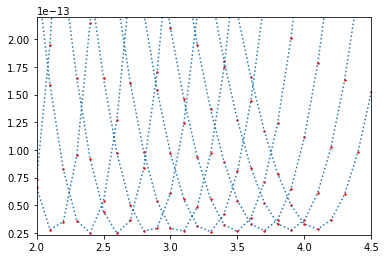

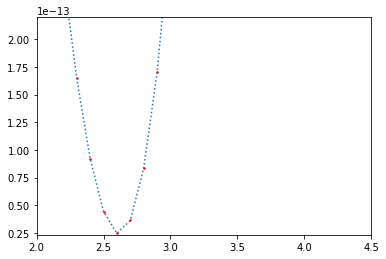

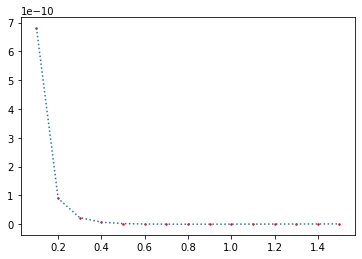

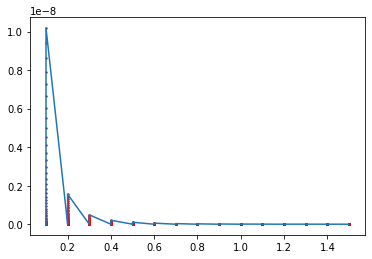

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:137: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


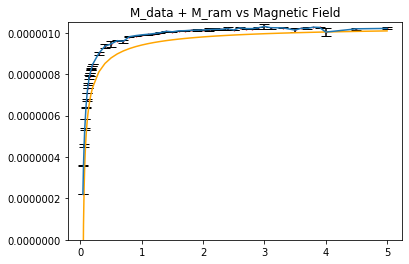

(array([0, 1, 2, 3]),)
[3.56431683e-08 1.36481576e-07]
[[1.00000000e-01 1.00000000e-01 2.64220151e-12]
 [1.00000000e-01 2.00000000e-01 2.26483495e-12]
 [1.00000000e-01 3.00000000e-01 1.70323632e-12]
 ...
 [1.20000000e+00 4.20000000e+00 5.89385898e-13]
 [1.20000000e+00 4.30000000e+00 7.77034179e-13]
 [1.20000000e+00 4.40000000e+00 9.96990166e-13]]
[[8.00000000e-01 2.60000000e+00 2.45296952e-14]]


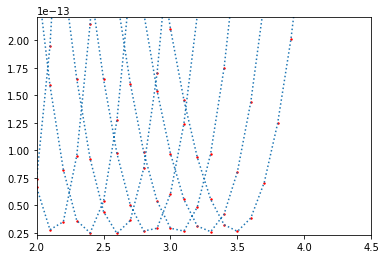

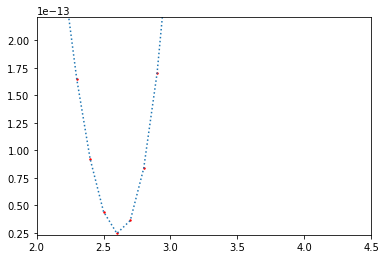

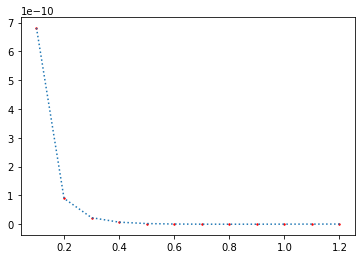

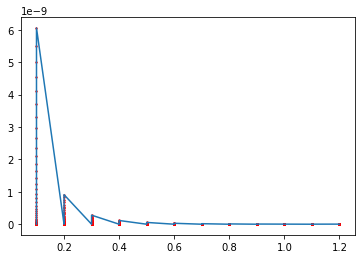

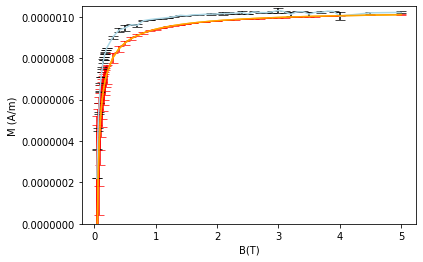

In [35]:
%matplotlib inline     
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys    


data = np.genfromtxt('S1Zone1')      #or data = np.recfromtxt('S1a2_MvsH_bgs.txt', names=['B', 'M']) ... B = data.B ... M = data.M
X = data[:,][:,0] #B data
Y = data[:,][:,1] #M data

Hc = 0.0280035666
Ms = 1.02781E-6

# Getting rid of values smaller than 20% of Msat 
print(np.where(Y<0.2*Ms))
X = X[np.where(Y>0.2*Ms)]
Y = Y[np.where(Y>0.2*Ms)]
r = np.zeros([10000000,3]) 



# MEAN DATA (delete around y=0)
mdata = np.genfromtxt('S1Z1MEANERROR.txt') # S1Z2 MEAN.txt for example
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data

#Getting rid of values smaller than 14% of Msat 
print(mY[np.where(mY<0.2*Ms)]) # Printing the data points being deleted
inxER = np.where(mY>0.2*Ms) # condition to keep future arrays of same size
mX = mX[np.where(mY>0.2*Ms)]
mY = mY[np.where(mY>0.2*Ms)]

                              
                           ### SAMPLE 1 ZONE 1 ### (DELETED DATA AROUND Y=0)


            



n = 0
nmax = 8200
# The Loop:
for Hex in np.arange(0.1,1.3,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,4.5,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX-Hc)/Hex)**0.5
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2)
        inx = np.min(r[n,2]) 
        
        dHr = Hr - 0.005
        dHex = Hex - 0.005
        dMs = Ms - 0.002E-6
        dHc = Hc - 0.0020
        λ2 = (dHr/dHex)
        p2 = ((mX+dHc)/dHex)**0.5  # dMs and λ2 and p2
        dM2 = np.absolute(M2 - (dMs*(1 - (λ2**2/(30*p2**4))*(2 - ((2 + 2*p2 + p2**2)*np.exp(-p2)))))   )
        
        
        n+=1  
    
  
          
# Printing ALL VALUES:
# inx bc r has 10000000 np.zeros that we don't need/crashes the labtop:
inx = r[:,1]>0
r = r[inx]
#np.set_printoptions(threshold=sys.maxsize)  # see import sys notes above
print(r)
print(r[r[:,2]==np.min(r[:,2])])

# Sub-plot preparation:
# plt.figure(figsize=(9, 6))



# 1st Graph: 
# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
#ax = plt.subplot(221) #replace plt.plot with ax.plot !!! 
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 2nd Graph:
# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
#ax = plt.subplot(222)
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 3rd Graph:
# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


# 4th Graph(s):
# Hex vs np.min(sum(M2-M1))
#ax = plt.subplot(223)
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()

# 5th Graph:
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
#plt.scatter(mX,mY,s=1, c="red", alpha=1)


# Standard Error of Mean (already half) 
SE = mdata[:,][:,2][inxER] #Don't forget inx!
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=0.7, ecolor="black", color="lightblue")


plt.plot(mX,M2,color="orange")                                     # @@@@  W.A.S  X before!
plt.ylim(0,10.5E-7)
plt.xlabel('B(T)')
plt.ylabel('M (A/m)')
#plt.title('M_data + M_ram vs Magnetic Field')
plt.errorbar(mX,M2, yerr=[dM2,dM2], capsize=5, capthick=0.7, ecolor="red",color="orange")
plt.show()


In [ ]:
data = np.genfromtxt('S1Zone1')      #or data = np.recfromtxt('S1a2_MvsH_bgs.txt', names=['B', 'M']) ... B = data.B ... M = data.M
X = data[:,][:,0] #B data
Y = data[:,][:,1] #M data
r = np.zeros([10000000,3]) 

                              
                           ### SAMPLE 1 ZONE 1 ### (DELETE AROUND Y=0) 
        

Hc = 0.0280035666
Ms = 1.02781E-6

# Getting rid of weird X values (NO!)
#X = np.delete(X, [92,96,128,130])
#Y = np.delete(Y, [92,96,128,130])

# Getting rid of values smaller than 40% of Msat...   --> S1 Zone1 is skewed by quadruple measurements. To be reviewed 
print(np.where(Y<0.40*Ms)) # Printing the data points being deleted
X = X[np.where(Y>0.40*Ms)]
Y = Y[np.where(Y>0.40*Ms)]


# MEAN DATA (delete around y=0)
mdata = np.genfromtxt('S1Z1MEANERROR.txt') # S1Z2 MEAN.txt for example
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data

#Getting rid of values smaller than 14% of Msat 
print(mY[np.where(mY<0.2*Ms)]) # Printing the data points being deleted
inxSE = np.where(mY>0.2*Ms) # condition to keep future arrays of same size
mX = mX[np.where(mY>0.2*Ms)]
mY = mY[np.where(mY>0.2*Ms)]

# Getting rid of weird X values (NO!)
#mX = np.delete(mX, [46,48,64,65])
#mY = np.delete(mY, [46,48,64,65])

            

n = 0
nmax = 8200
# The Loop:
for Hex in np.arange(0.1,1.6,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,5.1,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX-Hc)/Hex)**0.5
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2)
        #o[m] = np.min(r[n,2]) # np.min for each separate Hex exclusively kept in o[m]
        inx = np.min(r[n,2])   
        n+=1  
    #m+=1 # Hence m+=1 in Hex loop 
  
          
# Printing ALL VALUES:
# inx bc r has 10000000 np.zeros that we don't need/crashes the labtop:
inx = r[:,1]>0
r = r[inx]
#np.set_printoptions(threshold=sys.maxsize)  # see import sys notes above
print(r)
print(r[r[:,2]==np.min(r[:,2])])

# Sub-plot preparation:
# plt.figure(figsize=(9, 6))



# 1st Graph: 
# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
#ax = plt.subplot(221) #replace plt.plot with ax.plot !!! 
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 2nd Graph:
# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
#ax = plt.subplot(222)
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),9*np.min(r[:,2])])
plt.show()

# 3rd Graph:
# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


# 4th Graph(s):
# Hex vs np.min(sum(M2-M1))
#ax = plt.subplot(223)
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()

# 5th Graph:
# [5]M and dataM against x


#Plotting
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
plt.scatter(mX,mY,s=1, c="red", alpha=1)


# Standard Error of Mean (already half) 
SE = mdata[:,][:,2][inxSE] #Don't forget inx!
# Getting rid of weird X values
SE = np.delete(SE, [46,48,64,65])
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=1, ecolor="black")


plt.plot(mX,M2,color="orange")                                     # @@@@  W.A.S  X before!
plt.ylim(0,10.5E-7)
plt.title('M_data + M_ram vs Magnetic Field')
plt.show()